>## <b> Evaluation Project 9 :Customer Churn Analysis  </b>
<b><em> By: Ms. Yashshree bawiskar </em></b>

<b><em> Batch: 1838 </em></b>

# Customer Churn Analysis

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

## Importing Required Liabraries

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Insurance Claims dataset Csv file using pandas
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'
df=pd.read_csv(url)

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
pd.set_option('display.max_rows', None) # This will enable us to see truncated rows
df.head()

No of Rows: 7043
No of Columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__Oveservation:__

- Here we have 7043 no. of rows and 21 no. of features.
- we need to explore them, to predict the curn of customers , in primafecia it is can be inferred that our target feature is categorical. 

- Hence, in further steps we need to apply the classification Algorithm to predict it.

In [4]:
# As we have 21 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

- <b> There is interesting entry here under object datatype which is 'TotalCharges'. <u>This feature is numerical in nature but categories as Object datatypes.</u> This implies that there is presence of string variable in this column or might be data error.</b>
- 'SeniorCitizen' is categorical variable listed as Numerical variable. So we gone convert it into object datatype.
- At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our  analytical & modelling viewpoint.<b> We will drop 'CustomerID' column.</b>

   
#### We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.

In [5]:
df.drop(['customerID'],axis=1,inplace=True) ## drop the feature of Customer id its not much important feature in our data

## Let's do Data integirty Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


__Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.__

In [7]:
df.duplicated().sum()

22

In [8]:
#Converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [9]:
df.isin([' ','NA','-']).sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['TotalCharges'].isin([' ']).sum().any()

False

In [11]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [12]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156183
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

**We can impute missing value in TotalCharges either with mean and median. We can decide imputation method after checking distribution and Outliers in data**

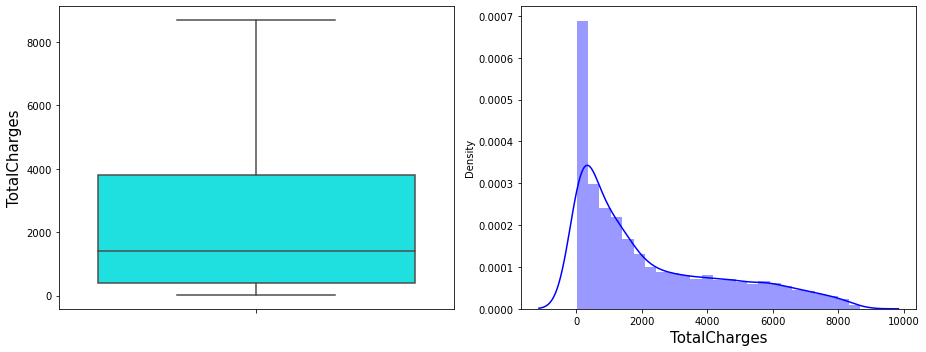

In [13]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [14]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2283.3004408418697
Median of TotalCharges: 1397.475


#### Observation:
- We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
- Distribution plot shows that Total Charges feature is right skewed.
- Mean is greater than Median.

<b> Considering above observation we can impute Missing value with Mean.</b>

#### Imputation of Missing value in TotalCharges with Mean

In [15]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

### Checking for Null values after Imputation

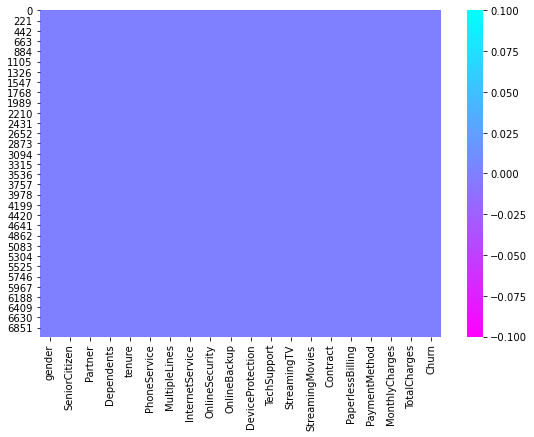

In [16]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Comment :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

In [17]:
#Checking unique values of each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**Above are the unique value counts in each feature of our data.**

In [18]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Male      3555
Female    3488
Name: gender, dtype: int64
****************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
****************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
****************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
****************************************
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
56     80
52     80
64     80
16     80
26     79
25     79
60     76
61     76
65     76
14     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
62     70
41     70
53     70
32     69
50     68
54     68
51     68
47     68
58     67
49     66
31     65
43     65
42     65
34     65
57     65
37     65
40     64
48     6

## Stastical Analysis

In [19]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.000000,2283.300441,2265.000258,18.800000,402.225000,1400.550000,3786.600000,8684.800000


#### The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.
#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [20]:
Categorical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        Categorical.append(i)
print(Categorical)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [21]:
# Now checking for numerical Features
Numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        Numerical.append(i)
print(Numerical)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
df[Categorical].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [23]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: T

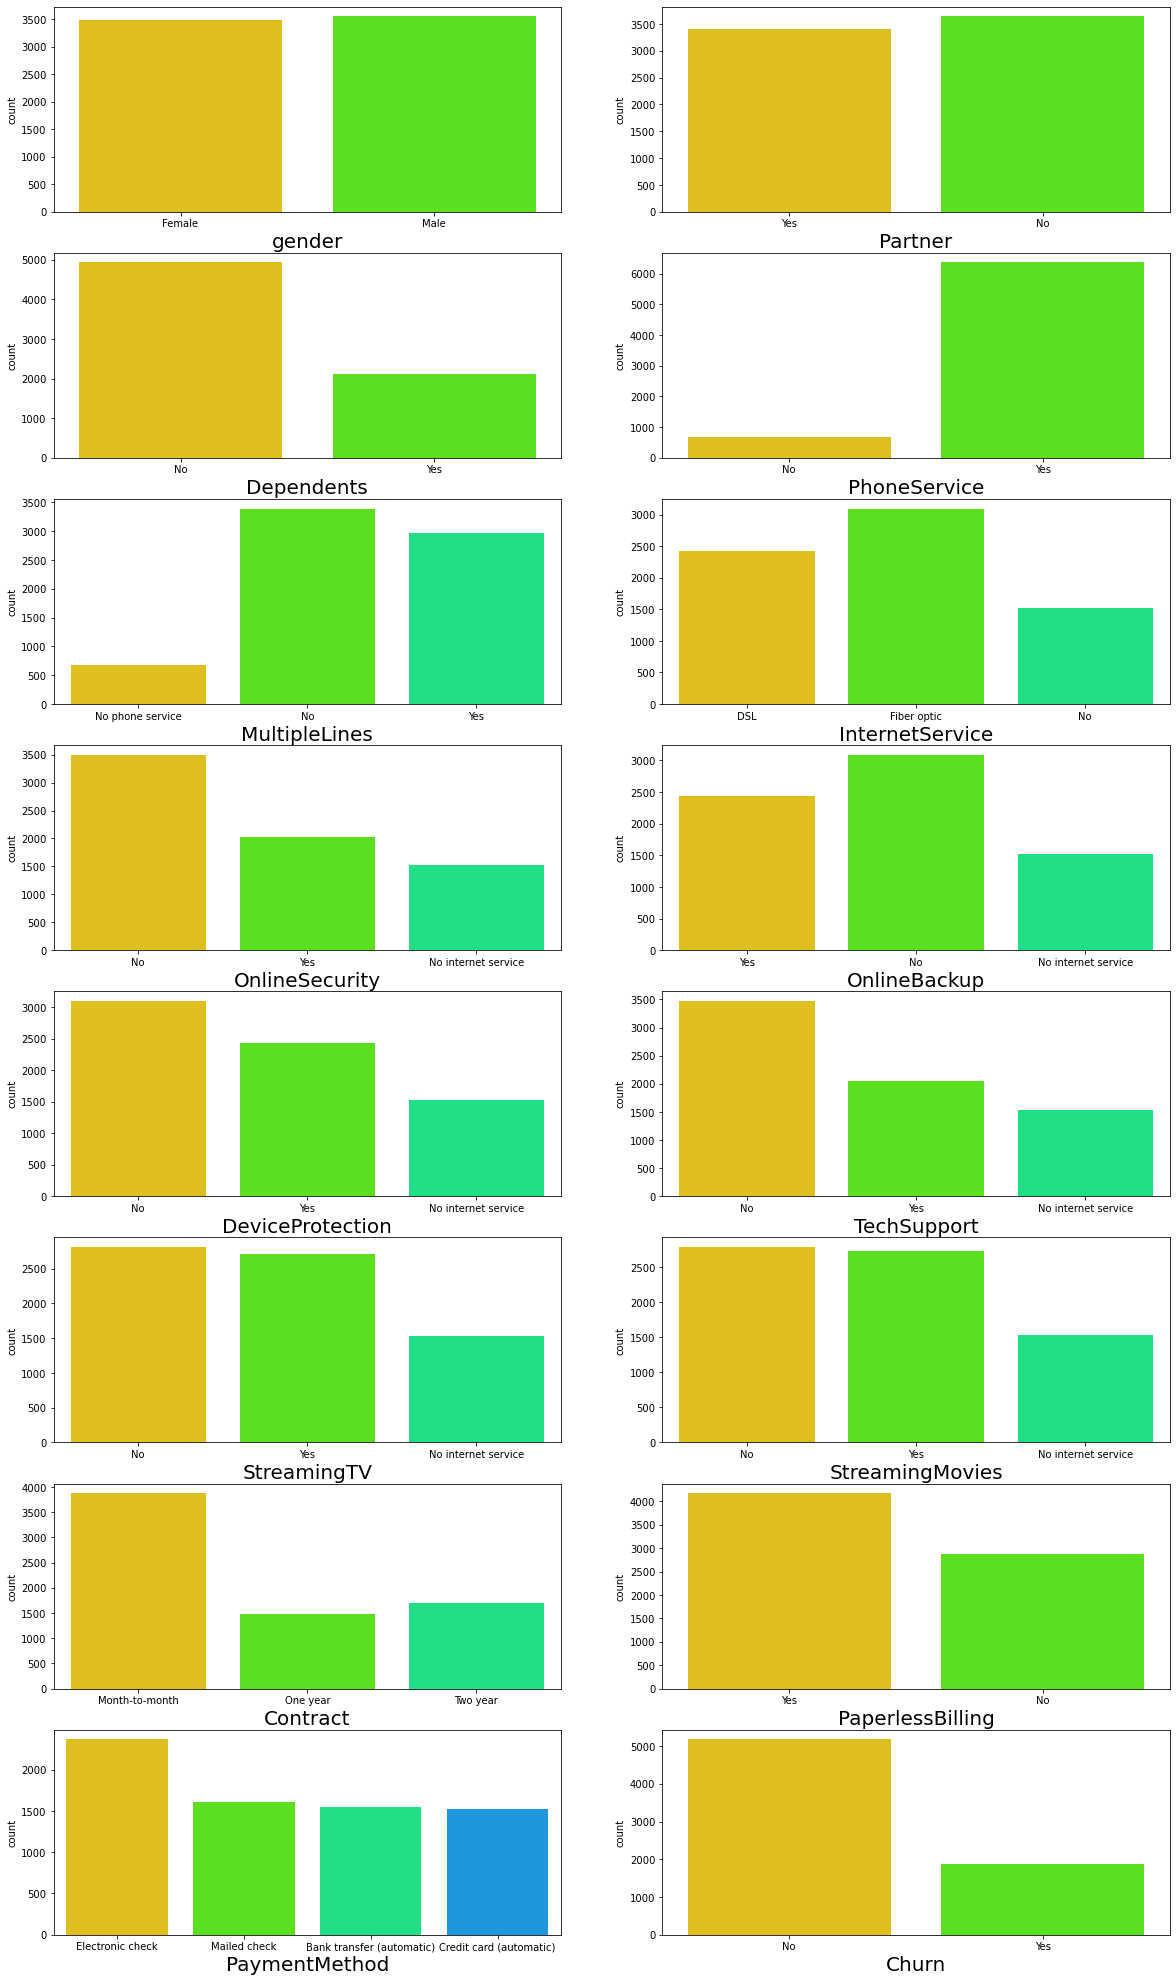

In [24]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(9,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

## Now Starting to exploreing  all feature one by one

## 1. Target Variable Churn

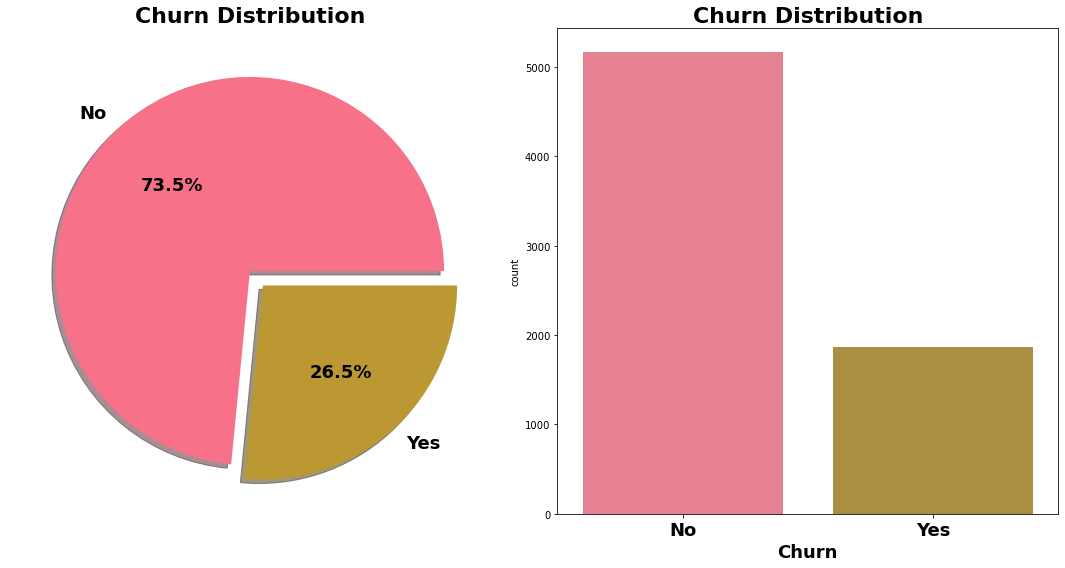

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

## Comment :
- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.
- Let start exploration of Independent feature to figure where customer are unstatisfied and what are customers need or inclination in cutting edge competition.

## 2. Gender vs Churn : Can there exist any trend between gender & churn or any impact of gender on Churn?

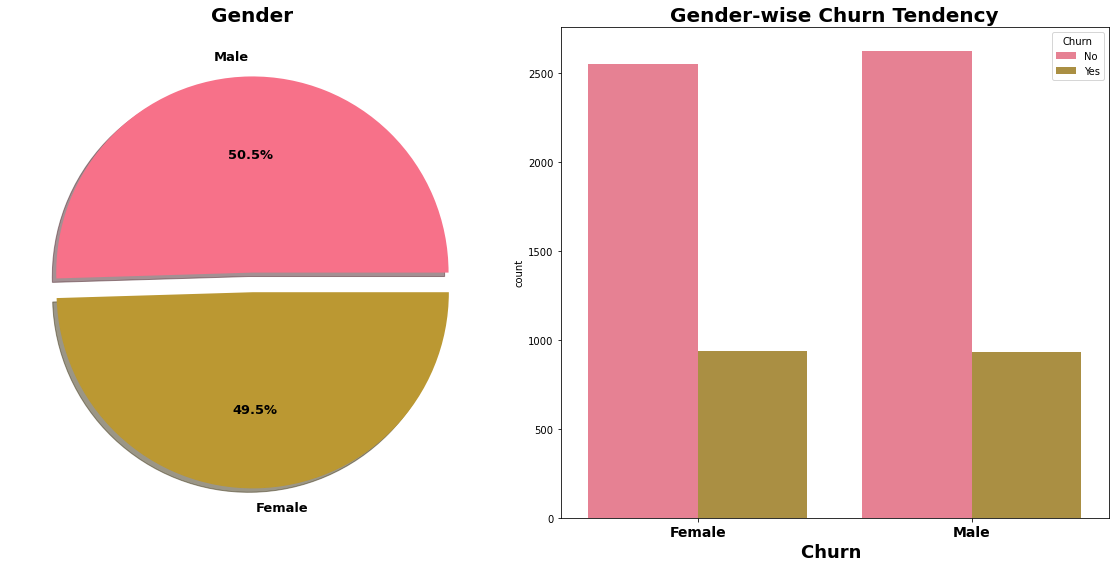

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [27]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


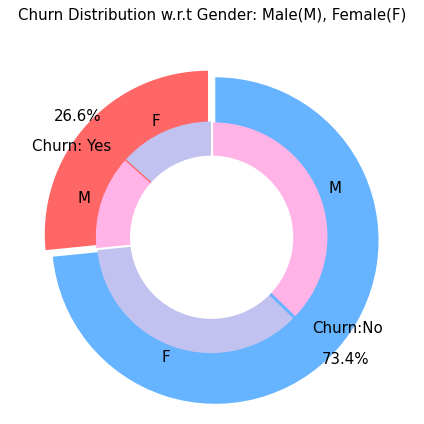

In [28]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

__Comments:__
- Data contain both gender almost in same proportion with minor difference.
- Both gender have tendency of attrition in same percentage.

### Next Investigate Senior Citizen vs Gender Wise Churn Tendency

<b>Lets see how many of them are Senior Citizen and Churn tendency in senior citizen </b>

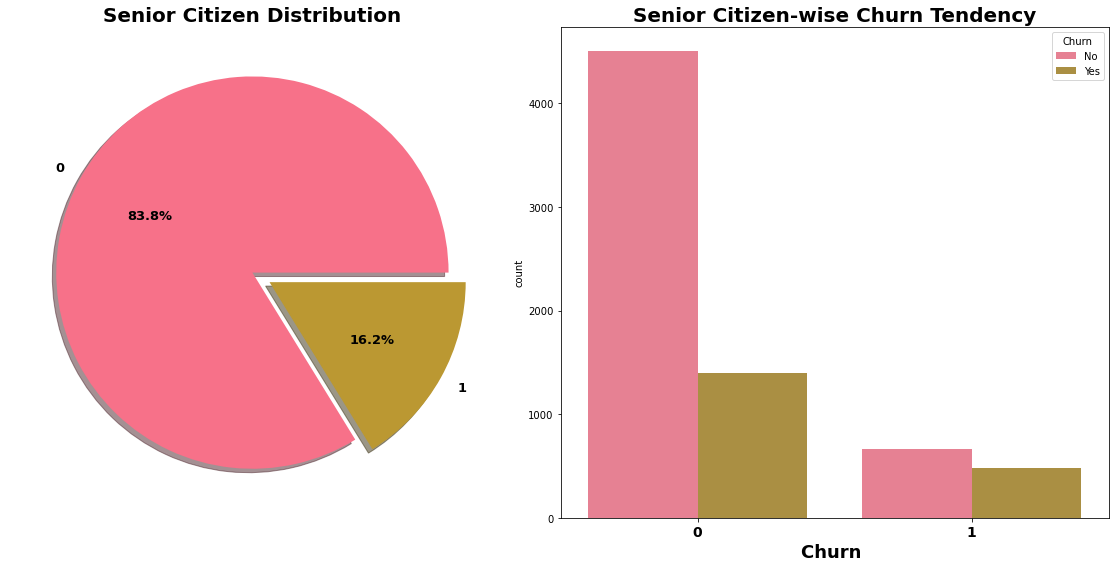

In [29]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.**

In [30]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

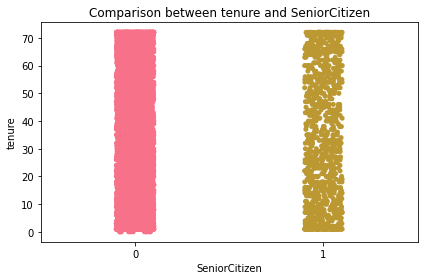

In [31]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

**Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.**

**There is no significant relation between Senior Citizen and Tenure.**

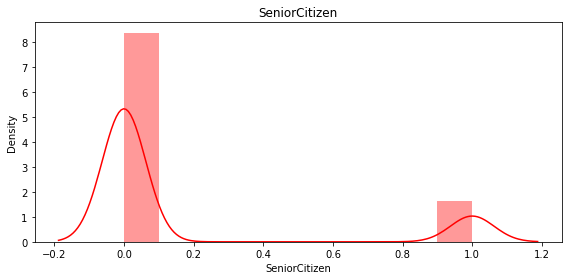

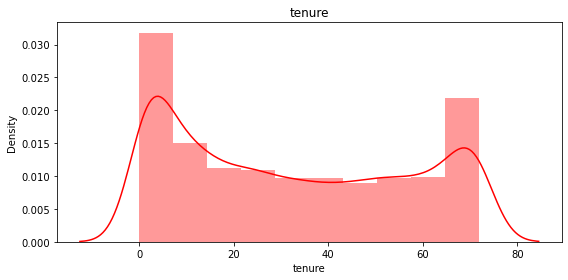

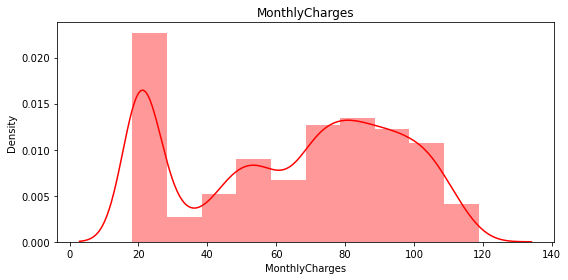

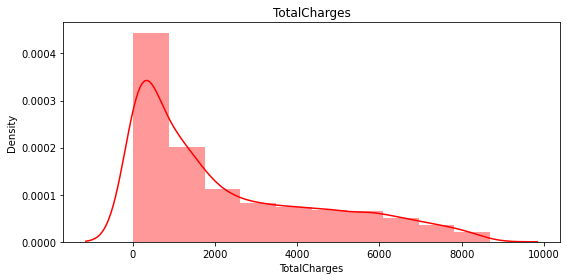

In [32]:
#Distribution plot for all numerical columns
for i in df[Numerical]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="r")
    plt.title(i)
    plt.show()

**There is some skewness in all numerical columns.**

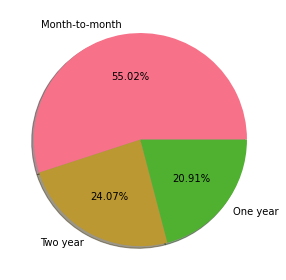

In [33]:
#Ploting pie chart for Contract column
labels='Month-to-month','Two year','One year'
fig, ax = plt.subplots()
ax.pie(df['Contract'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

__Most of the customer prefer Month to month contract.__

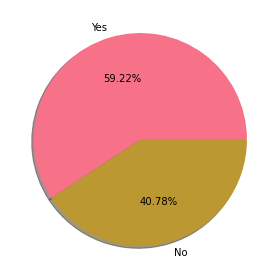

In [34]:
#Ploting pie chart for PaperlessBilling column
labels='Yes','No'
fig, ax = plt.subplots()
ax.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

__Most of the customer prefer Paper less Billing.__

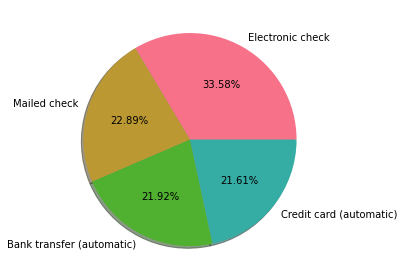

In [35]:
#Ploting pie chart for PaymentMethod column
labels='Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'
fig, ax = plt.subplots()
ax.pie(df['PaymentMethod'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

__Most of the customers uses Electronic check.And other 3 paymentmethods are also used simultaneously.__

**Effect of Partner and Dependents on Churn**

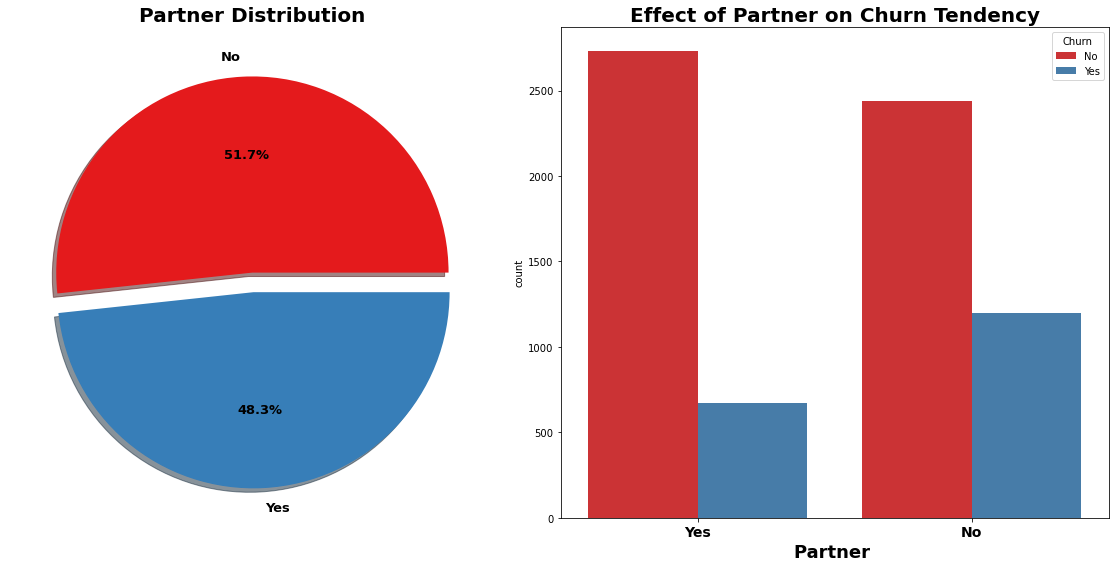

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

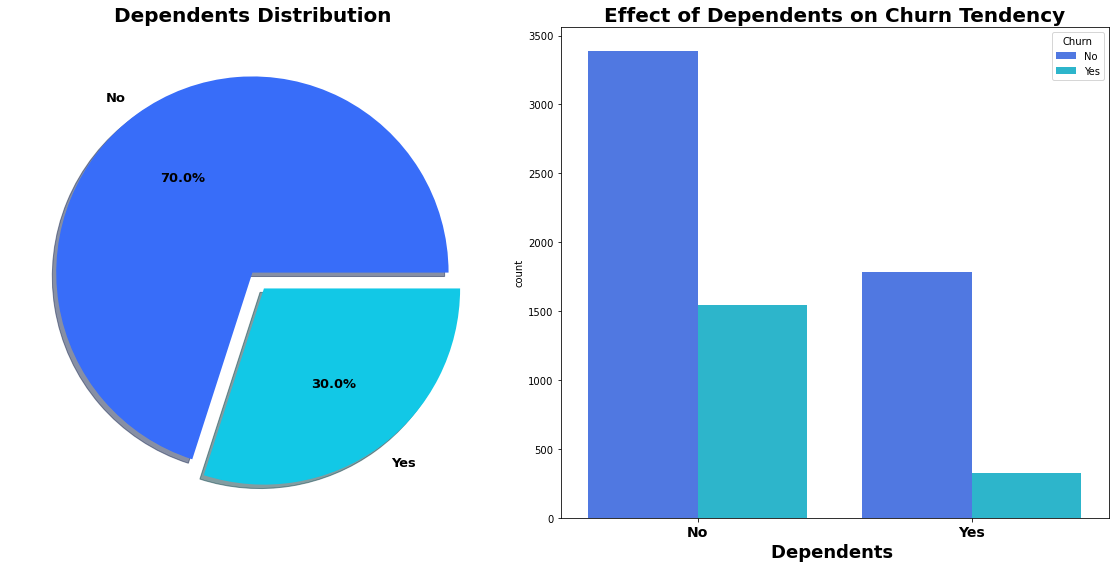

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

## Observation-
- Customer having Partner have less tendency to Churn.
- Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%

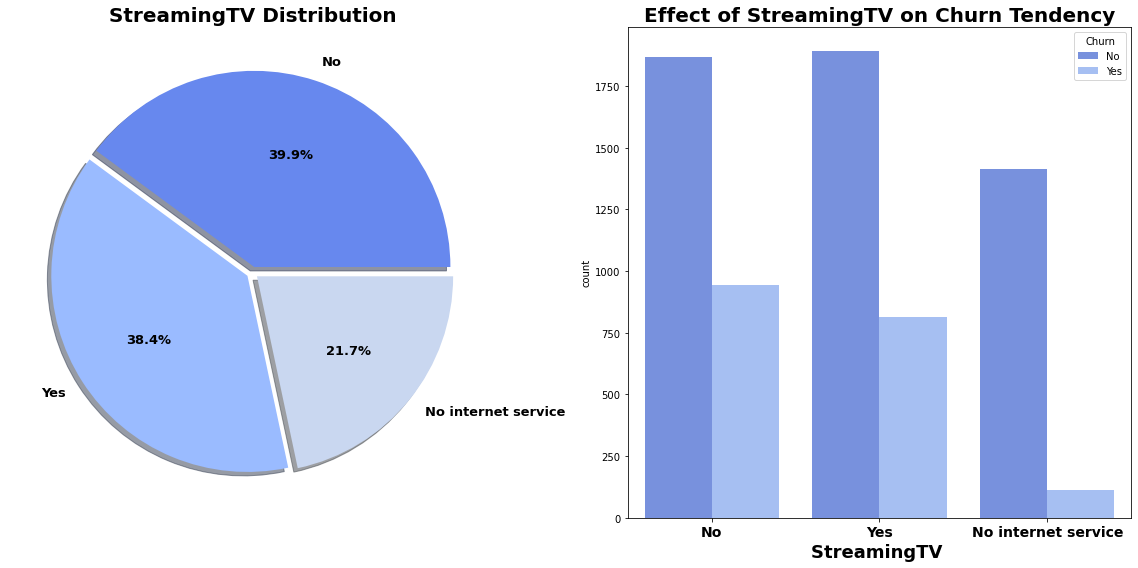

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

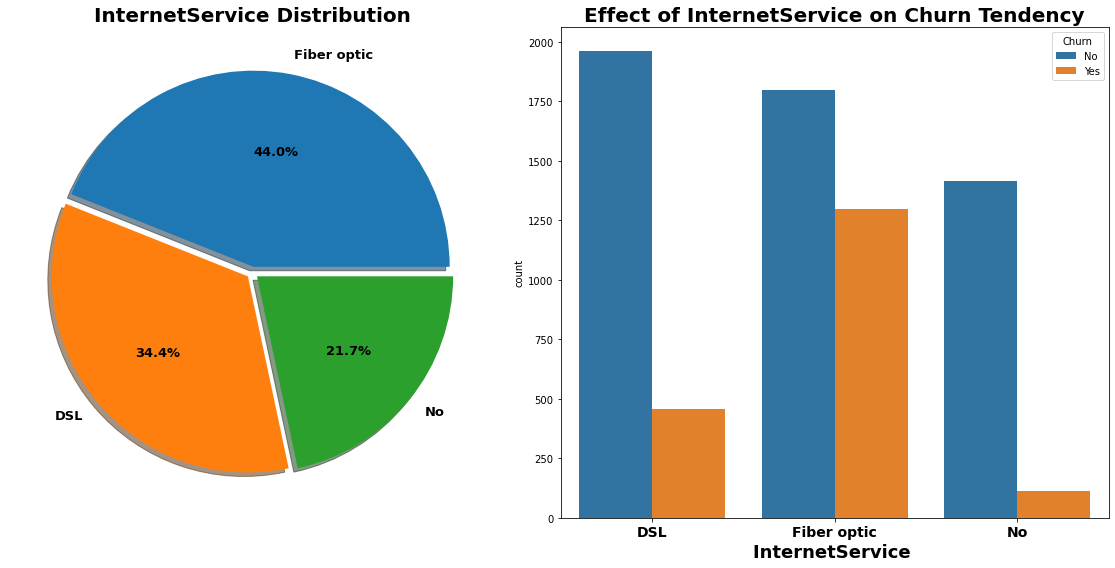

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

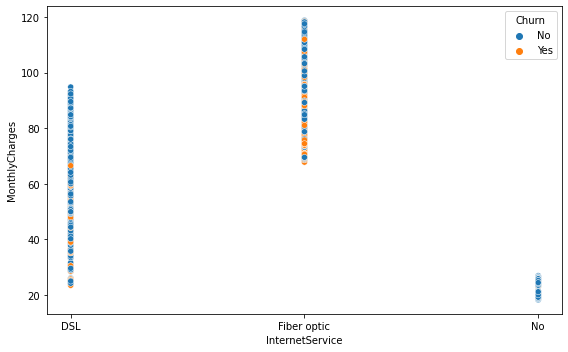

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.**

**We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.**

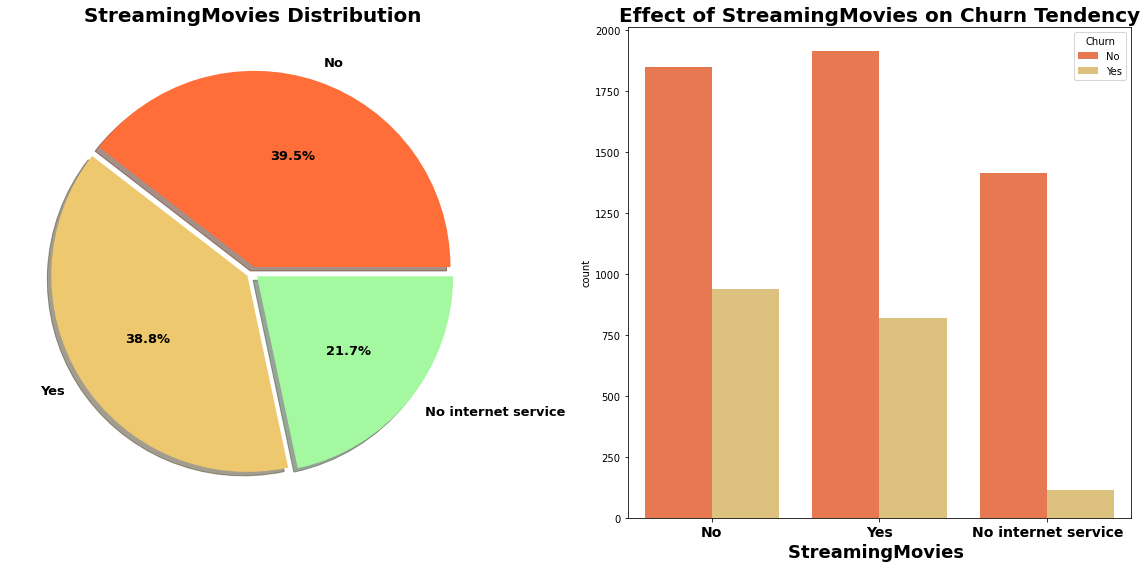

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**Almost same churn tendency in people streaming movies and not.**

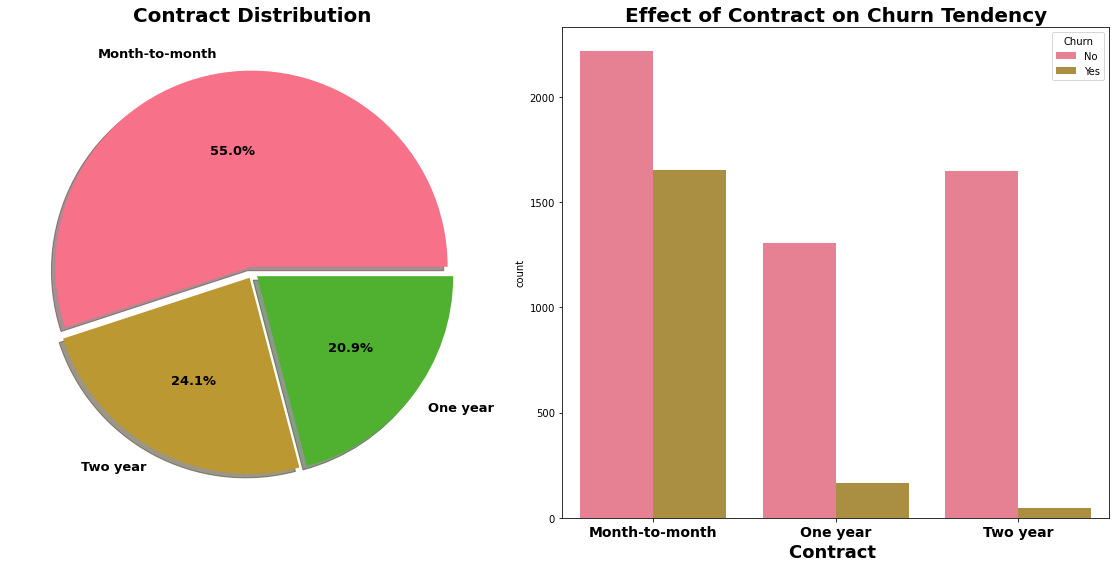

In [42]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

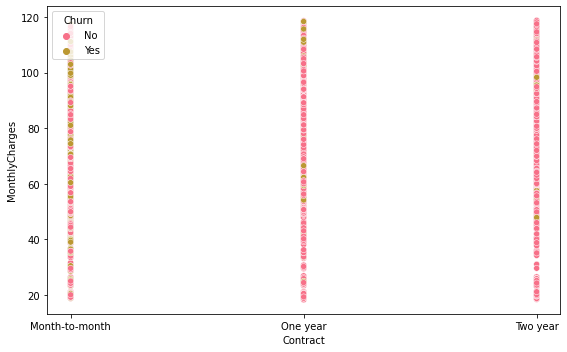

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.**

**We did not find any relation between Monthly charges and contract tenure.**

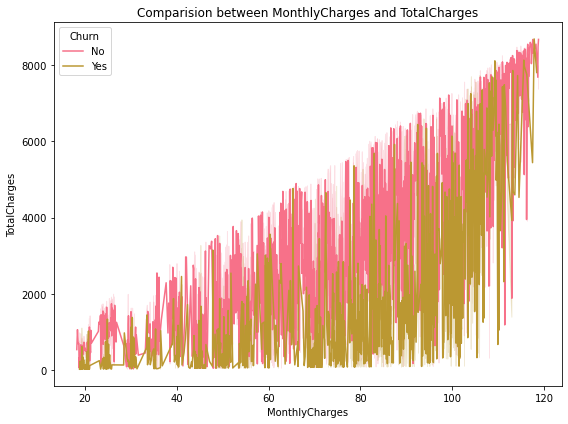

In [44]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between MonthlyCharges and TotalCharges')
sns.lineplot(df['MonthlyCharges'],df['TotalCharges'],hue=df['Churn']);

__Yes for churn has maximum count near 50-100 MonthlyCharges.And we can see a linearly increasing curve.__

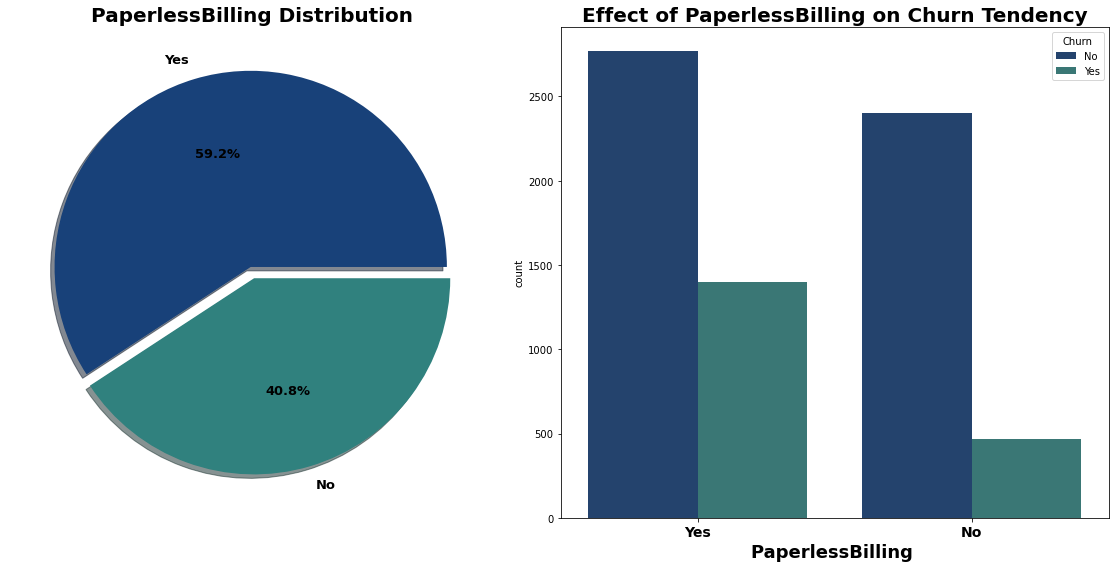

In [45]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

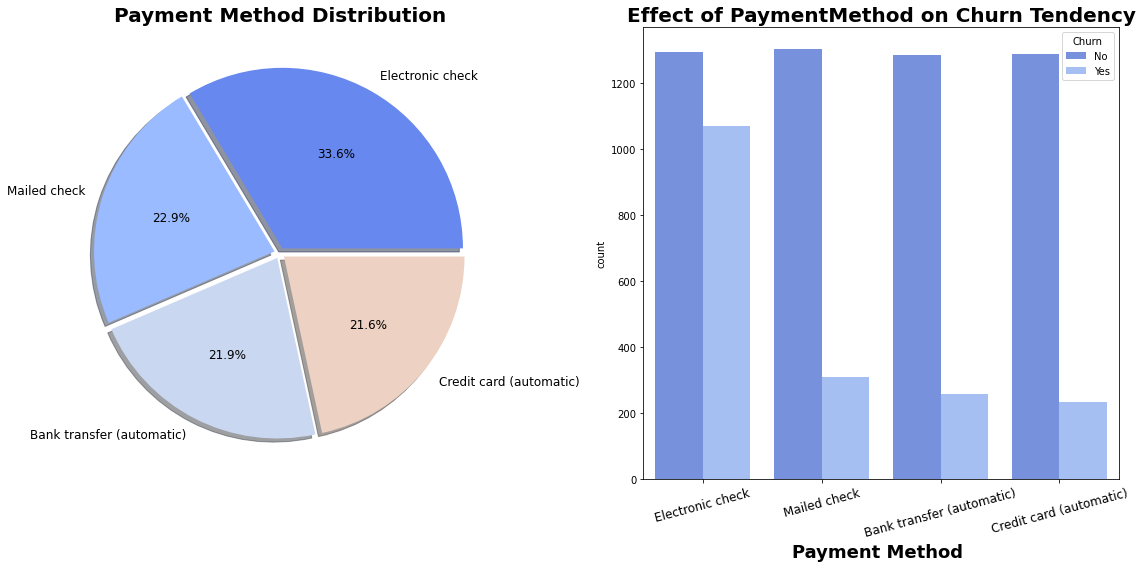

In [46]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

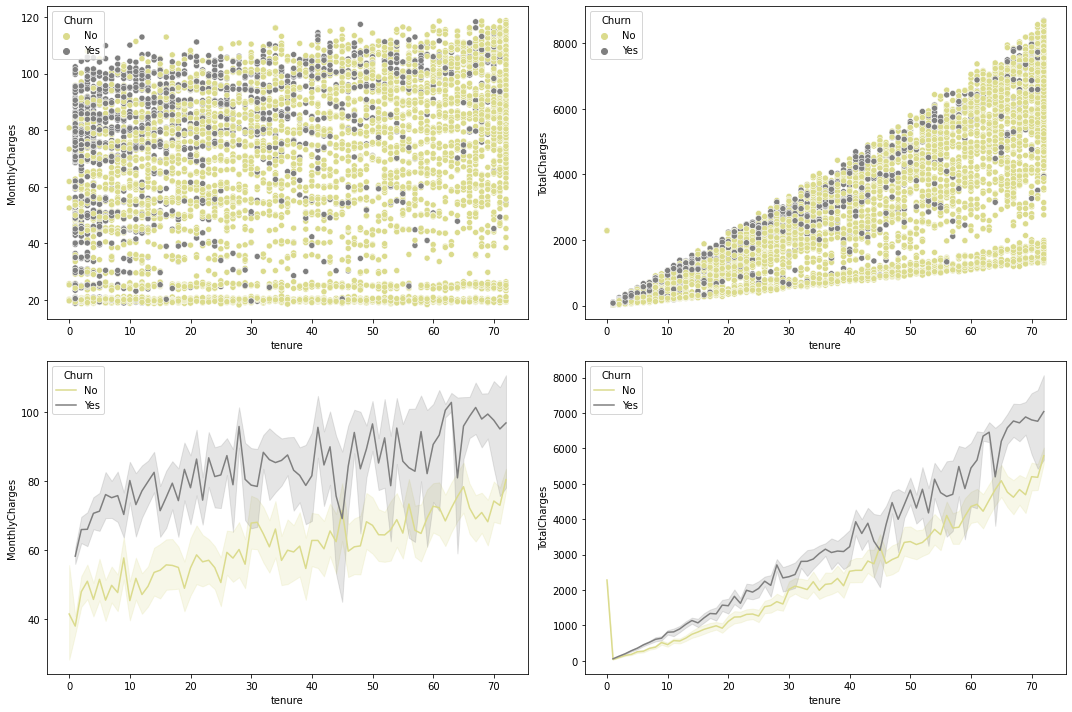

In [47]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

### Observation:
- **High Monthly Charges in customer who choose churn compare to rest.**
- **Same goes with High Total Charges in customer who choose churn compare to rest.**

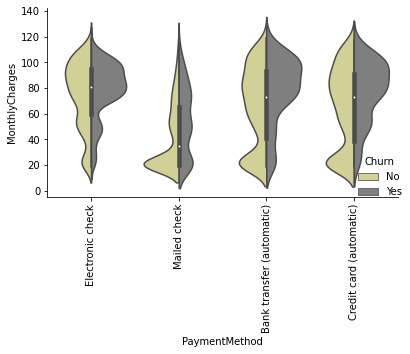

In [48]:
# Let's plot catplot for pair of features
sns.catplot(x = "PaymentMethod", y = "MonthlyCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);


**churn is high for payment using credit card**

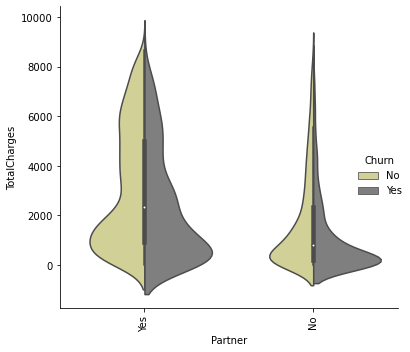

In [49]:
# Let's plot catplot for pair of features
sns.catplot(x = "Partner", y = "TotalCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);


- The churn rate and total charges is high for customers with partners.

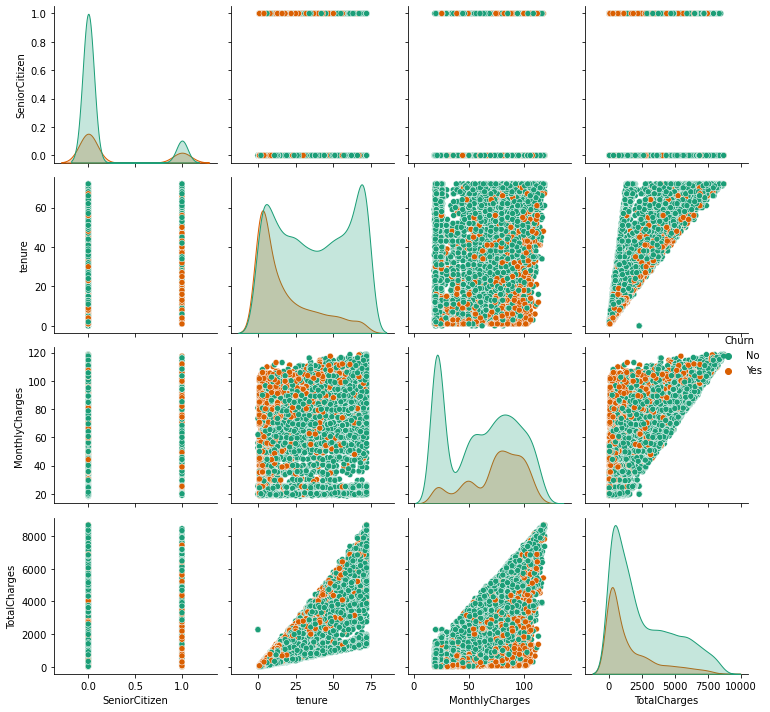

In [50]:
#pair ploting for df

sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

- Above pair plot have Churn as target.There are some outliers present in the dataset.

## Data Cleaning

## 1. Outlier Detection

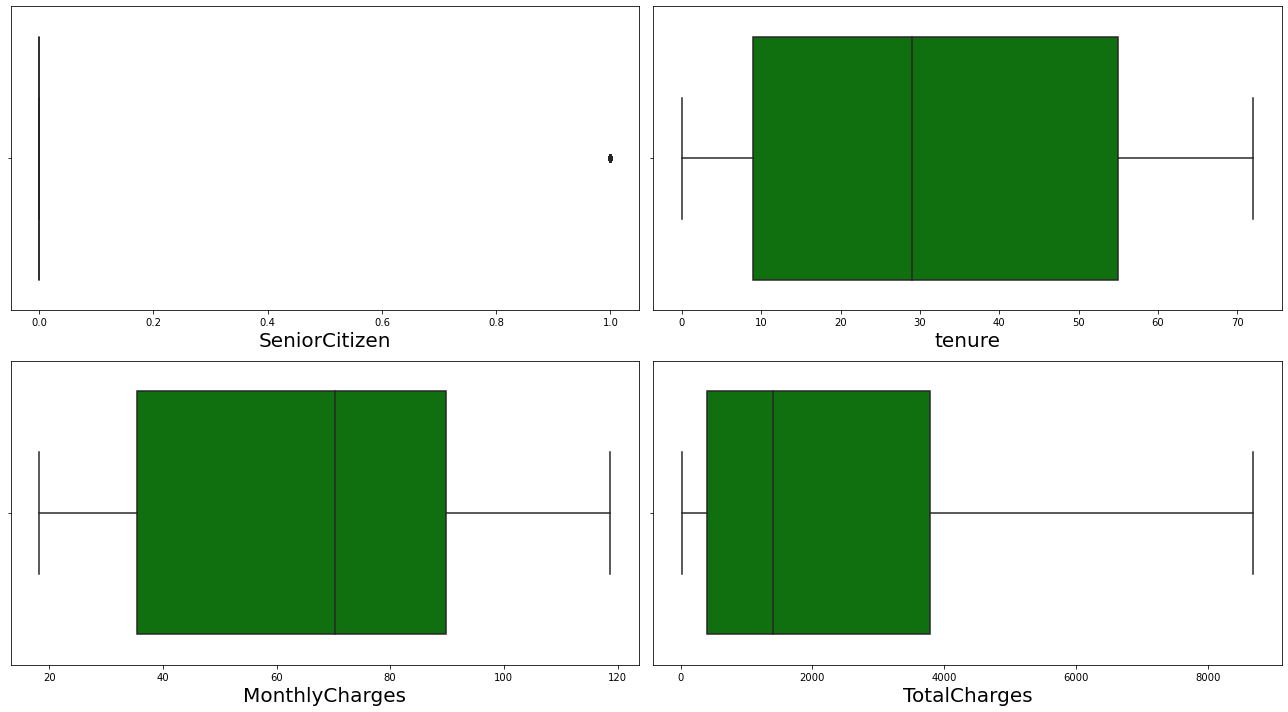

In [51]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

__From Boxplot we can see  outliers exist in senior Citizen feature only__

__this feature is a categorical feature with entries 0 and 1, so no need to remove the outliers from this feature.__

## Checking for skewness:

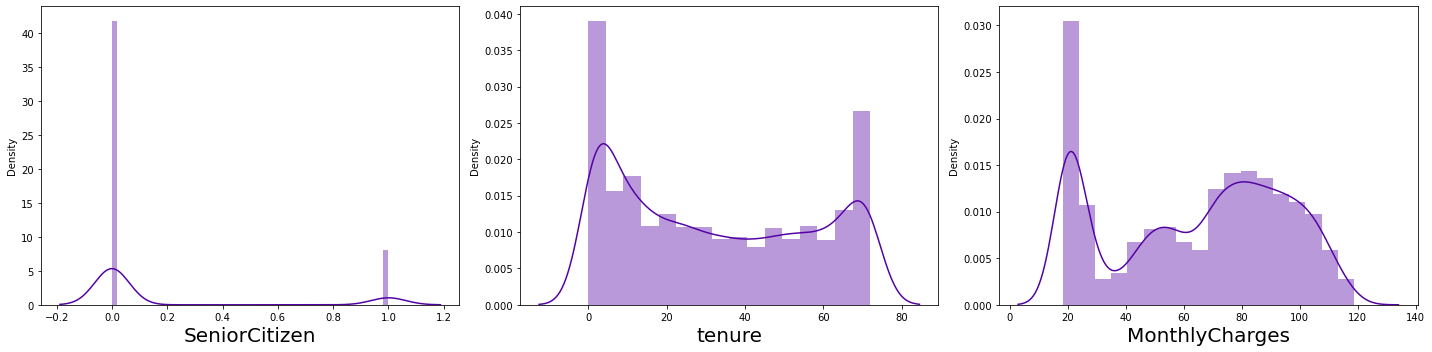

In [52]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [53]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

__Skewness is important feature for continous data.__

__There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.__

In [79]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [80]:
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

In [81]:
#Checking skewness again
df[['TotalCharges']].skew()

TotalCharges   -0.194261
dtype: float64

**here we have removed the skewness**

In [57]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.105478
tenure,0.016567,1.000000,0.247900,0.865270
MonthlyCharges,0.220173,0.247900,1.000000,0.617395
TotalCharges,0.105478,0.865270,0.617395,1.000000


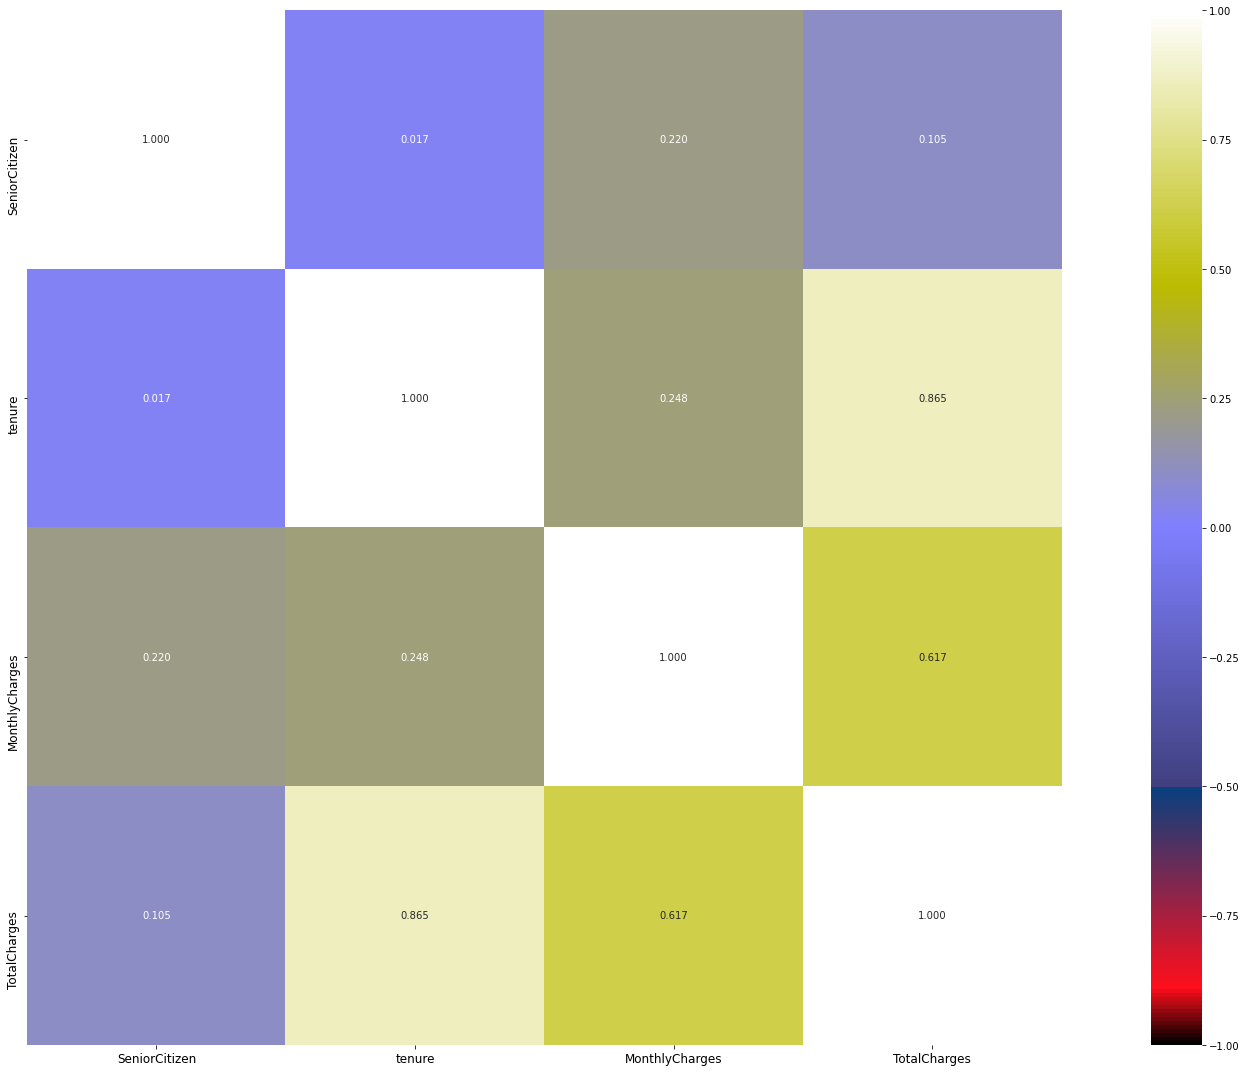

In [58]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Now Doing Label Encoding for Categorical Data

In [59]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1


## Now finding the correlation of features with our target(Churn)

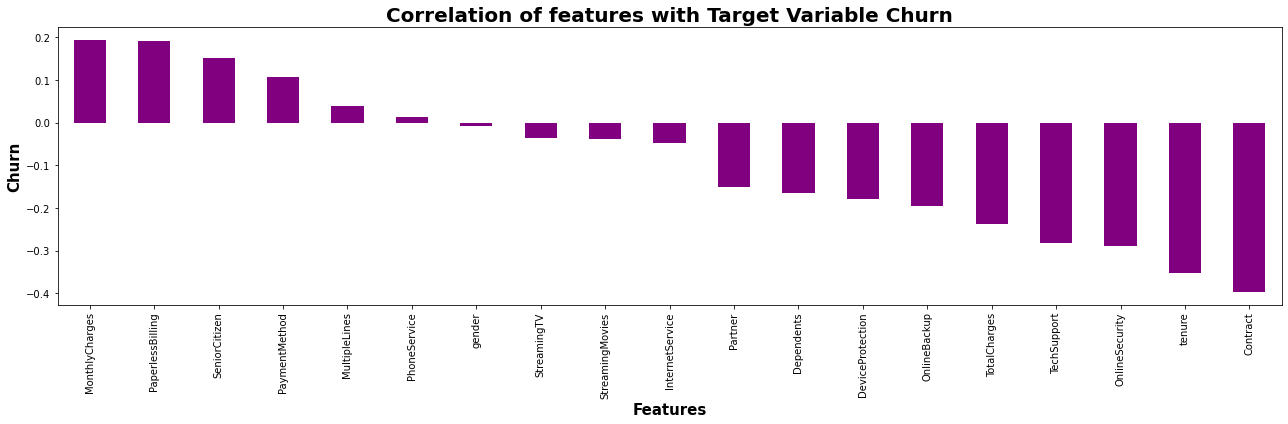

In [60]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

- Gender and PhoneService are very less correlated with target.

## Removing Outliers

In [63]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7043, 20)
Shape of the dataframe after removing outliers:  (6361, 20)
Percentage of data loss post outlier removal:  9.683373562402386


In [64]:
df['Churn'].value_counts() # checking value count for our target feature

0    4662
1    1699
Name: Churn, dtype: int64

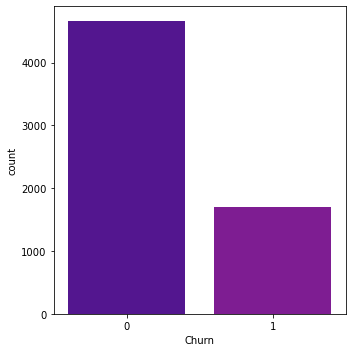

In [67]:

plt.figure(figsize=(5,5))
sns.countplot(df['Churn'])
plt.show()

- As we see here data imbalancing available in our target feature, so we need to do databalancing

## Data Balancing using SMOTE Method

In [68]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [70]:
# Oversampleing using SMOTE Techniques
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [71]:
Y.value_counts()

0    4662
1    4662
Name: Churn, dtype: int64

**We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.**

## Now Scaling Data using Standard Scaler

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.014787,gender
1,1.095292,SeniorCitizen
2,1.556536,Partner
3,1.441232,Dependents
4,11.238446,tenure
5,NaN,PhoneService
6,1.448423,MultipleLines
7,1.489162,InternetService
8,1.340613,OnlineSecurity
9,1.246035,OnlineBackup


- All Independent feature VIF is within permissible limit of 10 except TotalCharges
- we have two method to for removing multi colinerity of feature 1.  to remove the high VIF feature and 2. apply PCA.

**By removing the feature it may affect the model results, so here, we will use PCA method and will do futher analysis.**

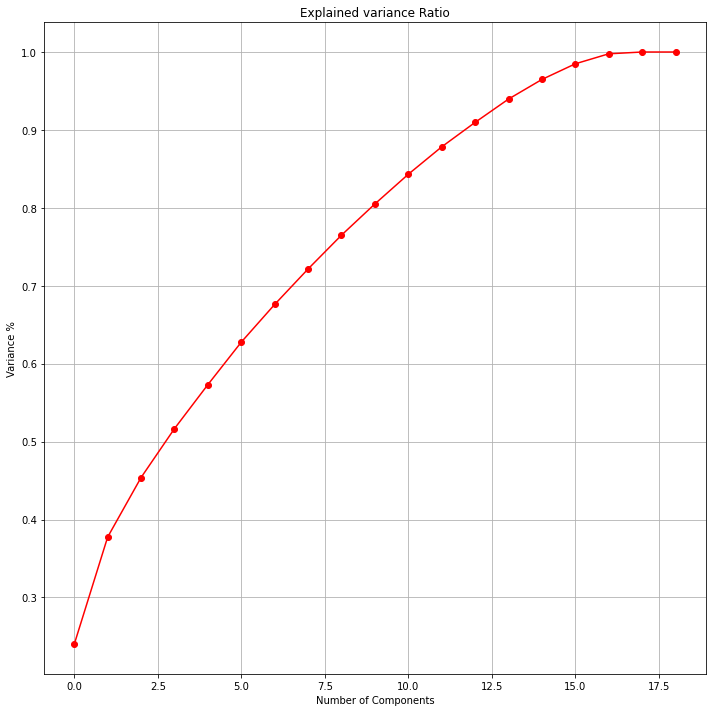

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [85]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [86]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

## Machine Learning Model Building

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6526, 13)
Training target vector size: (6526,)
Test feature matrix size: (2798, 13)
Test target vector size: (2798,)


## Finding Best Randome state

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8059328091493925 on Random_state 122


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=122, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8059328091493925


Confusion matrix of Logistics Regression : 
 [[1105  299]
 [ 244 1150]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1404
           1       0.79      0.82      0.81      1394

    accuracy                           0.81      2798
   macro avg       0.81      0.81      0.81      2798
weighted avg       0.81      0.81      0.81      2798



## Finding Optimal value for k for KNearest Neighbors

In [92]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.46576890397331816
RMSE value for k=  2 is: 0.47262441584839865
RMSE value for k=  3 is: 0.45332541444260194
RMSE value for k=  4 is: 0.459589274944522
RMSE value for k=  5 is: 0.4552921282947962
RMSE value for k=  6 is: 0.45371943921446267
RMSE value for k=  7 is: 0.4513501309093734
RMSE value for k=  8 is: 0.45685940359515836
RMSE value for k=  9 is: 0.45764102846705423
RMSE value for k=  10 is: 0.44976365805363805
RMSE value for k=  11 is: 0.4552921282947962
RMSE value for k=  12 is: 0.45332541444260194
RMSE value for k=  13 is: 0.45253633566432816
RMSE value for k=  14 is: 0.44537171952085547
RMSE value for k=  15 is: 0.44777266262930965
RMSE value for k=  16 is: 0.44376387412997564
RMSE value for k=  17 is: 0.44857012125330065
RMSE value for k=  18 is: 0.44295776288466326
RMSE value for k=  19 is: 0.44617346943988373
RMSE value for k=  20 is: 0.44336100171453424


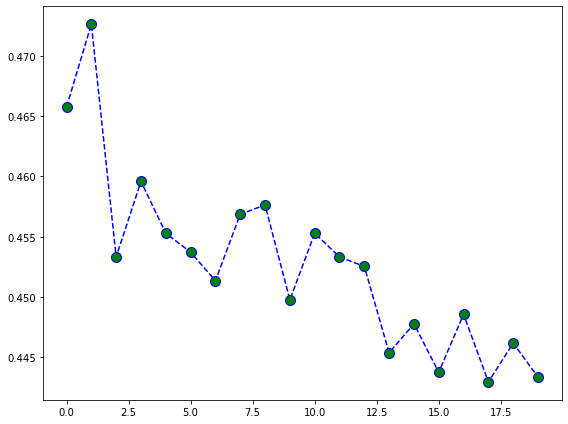

In [93]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

## Implementing Other ML MOdel for Classification Algorithm

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8059328091493925


Confusion matrix : 
 [[1105  299]
 [ 244 1150]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1404
           1       0.79      0.82      0.81      1394

    accuracy                           0.81      2798
   macro avg       0.81      0.81      0.81      2798
weighted avg       0.81      0.81      0.81      2798



Cross Validation Score LogisticRegression() :

CVScore : [0.75013405 0.73887399 0.78873995 0.78766756 0.80740343]
Mean CV Score : 0.77456379661485
Std deviation : 0.02577474797013036


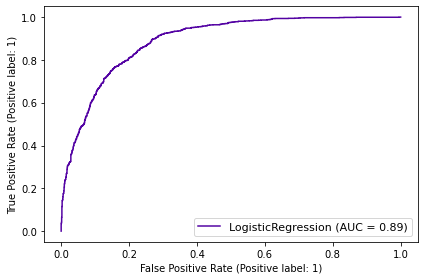

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8209435310936383


Confusion matrix : 
 [[1113  291]
 [ 210 1184]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      1404
           1       0.80      0.85      0.83      1394

    accuracy                           0.82      2798
   macro avg       0.82      0.82      0.82      2798
weighted avg       0.82      0.82      0.82      2798



Cross Validation Score SVC() :

CVScore : [0.7383378  0.7458445  0.80697051 0.81876676 0.83476395]
Mean CV Score : 0.7889367039086861
Std deviation : 0.039325241515651976


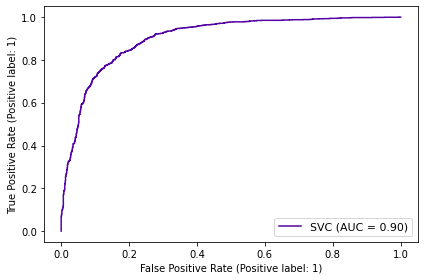

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7887776983559686


Confusion matrix : 
 [[1079  325]
 [ 266 1128]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      1404
           1       0.78      0.81      0.79      1394

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



Cross Validation Score GaussianNB() :

CVScore : [0.71689008 0.72761394 0.78820375 0.80321716 0.80364807]
Mean CV Score : 0.7679146003290798
Std deviation : 0.03784823867098459


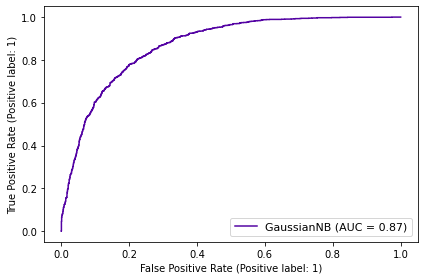

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7880629020729092


Confusion matrix : 
 [[1099  305]
 [ 288 1106]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1404
           1       0.78      0.79      0.79      1394

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.70241287 0.72171582 0.7769437  0.78552279 0.7945279 ]
Mean CV Score : 0.7562246142516885
Std deviation : 0.03699017700802878


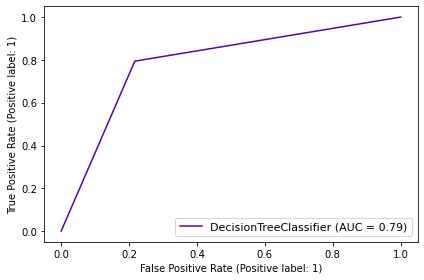

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7944960686204432


Confusion matrix : 
 [[1022  382]
 [ 193 1201]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1404
           1       0.76      0.86      0.81      1394

    accuracy                           0.79      2798
   macro avg       0.80      0.79      0.79      2798
weighted avg       0.80      0.79      0.79      2798



Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

CVScore : [0.7308311  0.74101877 0.80536193 0.79946381 0.81276824]
Mean CV Score : 0.7778887687121011
Std deviation : 0.034671762946340064


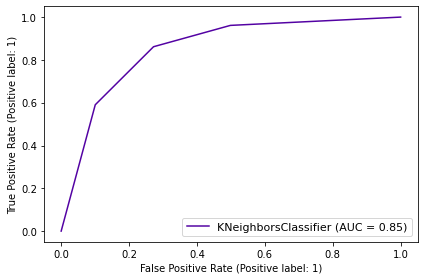

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8588277340957827


Confusion matrix : 
 [[1200  204]
 [ 191 1203]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1404
           1       0.86      0.86      0.86      1394

    accuracy                           0.86      2798
   macro avg       0.86      0.86      0.86      2798
weighted avg       0.86      0.86      0.86      2798



Cross Validation Score RandomForestClassifier() :

CVScore : [0.72975871 0.74852547 0.8386059  0.84932976 0.85997854]
Mean CV Score : 0.8052396759829247
Std deviation : 0.0547128147699732


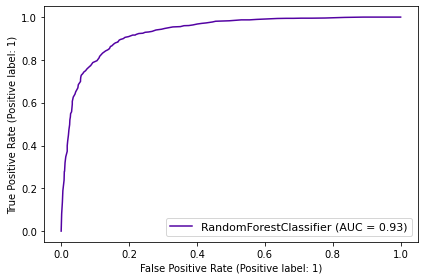

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8581129378127234


Confusion matrix : 
 [[1202  202]
 [ 195 1199]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1404
           1       0.86      0.86      0.86      1394

    accuracy                           0.86      2798
   macro avg       0.86      0.86      0.86      2798
weighted avg       0.86      0.86      0.86      2798



Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.72171582 0.74798928 0.84879357 0.84986595 0.85032189]
Mean CV Score : 0.8037372999344141
Std deviation : 0.056856678043020796


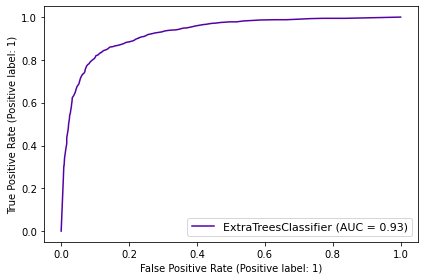

In [97]:
from sklearn.metrics import plot_roc_curve
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
       
    
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    
    
    
    CVscore = cross_val_score(m, principle_x, Y, cv =5)
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("CVScore :" ,CVscore)
    print("Mean CV Score :",CVscore.mean())
    print("Std deviation :",CVscore.std())
    
    
    
    
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')
    
    
    

Confusion Matrix LogisticRegression() is


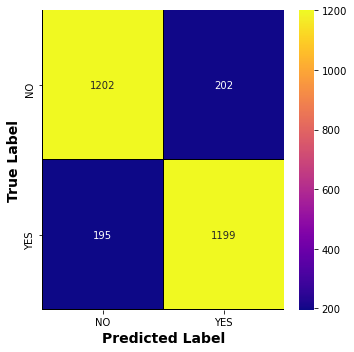

Confusion Matrix SVC() is


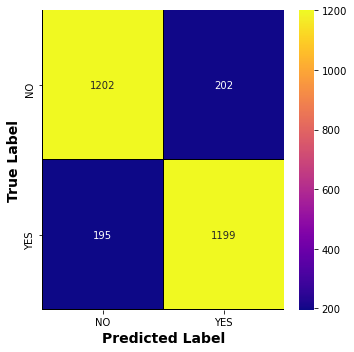

Confusion Matrix GaussianNB() is


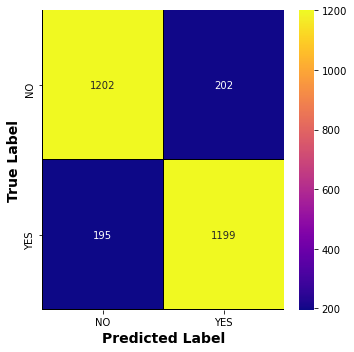

Confusion Matrix DecisionTreeClassifier() is


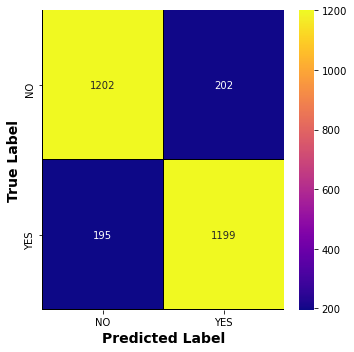

Confusion Matrix KNeighborsClassifier(n_neighbors=3) is


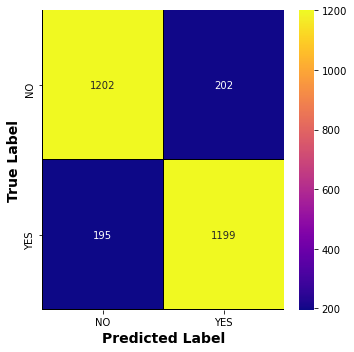

Confusion Matrix RandomForestClassifier() is


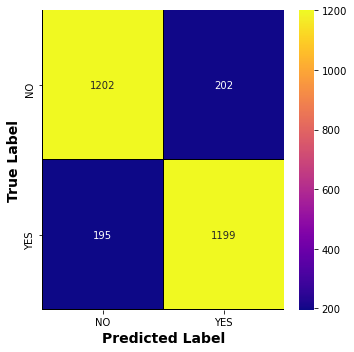

Confusion Matrix ExtraTreesClassifier() is


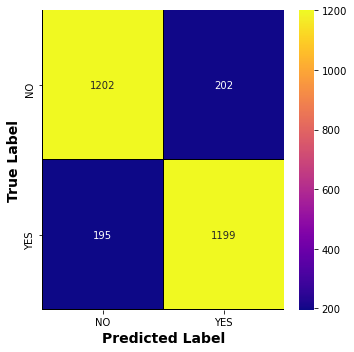

In [98]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
       

for m in model:
    Matrix = confusion_matrix(Y_test, y_pred)
    x_labels = ["NO","YES"]
    y_labels = ["NO","YES"]

    fig , ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

    plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
    plt.ylabel("True Label",fontsize=14,fontweight='bold')
    plt.title( print('\033[1m'+'Confusion Matrix',m,'is' +'\033[0m'),fontsize=20,fontweight='bold')
    plt.show()

**As we compare all machine learning model accuracy , here we got the best accuracy of 85.88% and F1 score 86% for Random Forest Classifier. So, here we will do hyper paratunning on our best model.**

## Hyper Parameter Tunning: GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [101]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.796 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.802 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.782 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.786 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [102]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 50}

## Final Model

In [103]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 50, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Accuracy Score :
 0.8534667619728378


Confusion matrix of Extra Trees Classifier : 
 [[1197  207]
 [ 203 1191]]


Classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1404
           1       0.85      0.85      0.85      1394

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



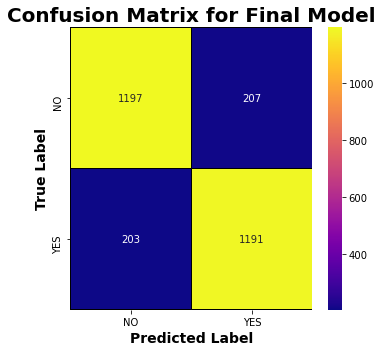

In [104]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

## AOC and ROC Plot

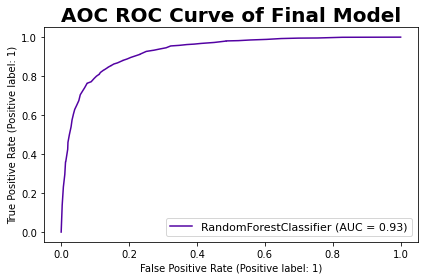

Auc Score :
 0.853469999632123


In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

##  Saving Final Model

In [107]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']

## Prediction base on our Final Model

In [108]:
# Prediction
prediction = Final_mod.predict(X_test)

In [109]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,0
1,0,0
2,0,0
3,0,1
4,1,1


## Summarizing the Project Report:

**1. I have imported necessary liabries like pandas, numpy , matplotlib to load the dataset and to check some stastical features.**

**2. After loading data set I have checked shape of dataset, data types from which we will able to decide which is our target variable and which features affecting the target features.**

**3. Missing value checked, and missing value filled by using mode function.**

**4. after finding the data types we have distribute the dataset into two features 1. categorical and 2. numerical features, so it helps us to further pre processing on data set.**


**5. after this we have done exploratives data analysis by using various plots(like pie charts, crosstrab, barchart, scatter plot, volin plot etc) base on our target variable /feature.**

**6. Now we have done the feature engineering on dataset by using label encoding.**

**7. after that check the correlation of various feature with target feature and non correlated features we have drop in further steps.**

**8. After checking malticolinearity we have done the PCA, where we got the best 13 features which are highly correlated to our target features.**

**9. Also we have done the data balacing using SMOTE oversampling feature**

**10. afterwards implemented various machine learning model using the best random state of 122, and having the sampling ratio as 70: 30.**

**11. Indentified the final model  base on highest accuracy, F1 score and CV score. Here we got 85.88% accuracy and having very negligible difference in cv score and accuracy score.**

**12. Afterwards deployed hyper parameter tunning on best model using gridsearchCV.**

**13. Afterwards we have save the final model and plotted the AOC and Roc plot on final model.In the final model we got 85.34 accuracy and while ploting AOC and ROC we got the accuracy of 85.34.**


**saved the final model using joblib method in pkl file.**

**Prediction of our final model is plotted.**

**Thank You**
